In [14]:
# -----------------------------------------------
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
# -----------------------------------------------

import pandas as pd
from pathlib import Path
from PIL import Image
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from utils.config import (
    dataset_test_path,
    dataset_train_path,
    dataset_validate_path,
    dataset_images_path)

sns.set_theme(style="darkgrid")
pd.options.display.float_format = '{:20,.2f}'.format

%matplotlib inline

# Data Analysis

In [15]:
test_df = pd.read_csv(dataset_test_path, sep='\t', header=0)
train_df = pd.read_csv(dataset_train_path, sep='\t', header=0)
validate_df = pd.read_csv(dataset_validate_path, sep='\t', header=0)

train_df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,ummmbacon,venezuelan opposition blocks streets to protes...,"1,493,741,162.00",reuters.com,True,68u145,https://external-preview.redd.it/c44lW8FUOQR0i...,NaN,1.00,13,neutralnews,Venezuelan opposition blocks streets to protes...,0.83,1,0,0
1,johnny-faux,pilot is done with this shit,"1,374,272,634.00",i.imgur.com,True,1intj4,https://external-preview.redd.it/1aSDqJtNfI8ix...,NaN,3.00,31,photoshopbattles,Pilot is done with this shit,0.88,1,0,0
2,yanikisan,someone decided to nuke this persons back,"1,551,720,466.00",i.redd.it,True,ax9q0x,https://preview.redd.it/bz1axsv305k21.jpg?widt...,NaN,0.00,7,mildlyinteresting,Someone decided to nuke this person's back,0.77,1,0,0
3,NaN,ceos are cashing in on the market boom,"1,537,994,846.00",money.cnn.com,True,9j6dof,https://external-preview.redd.it/l21V9aedva2JM...,NaN,0.00,2,usanews,CEOs are cashing in on the market boom,0.76,1,0,0
4,zhacker78,dumb down the voting pool,"1,551,208,235.00",wlos.com,True,av380s,https://external-preview.redd.it/8SWhR2SX7f44z...,NaN,1.00,5,usnews,Dumb down the voting pool.,0.72,1,0,0


Convert the label columns from int64 to category.

In [16]:
for df in [test_df, train_df, validate_df]:
    for col in ['2_way_label', '3_way_label', '6_way_label']:
        df[col] = df[col].astype('category').cat.as_ordered()
        
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   author                9512 non-null   object  
 1   clean_title           10000 non-null  object  
 2   created_utc           10000 non-null  float64 
 3   domain                7597 non-null   object  
 4   hasImage              10000 non-null  bool    
 5   id                    10000 non-null  object  
 6   image_url             9963 non-null   object  
 7   linked_submission_id  2403 non-null   object  
 8   num_comments          7597 non-null   float64 
 9   score                 10000 non-null  int64   
 10  subreddit             10000 non-null  object  
 11  title                 10000 non-null  object  
 12  upvote_ratio          7597 non-null   float64 
 13  2_way_label           10000 non-null  category
 14  3_way_label           10000 non-null  category
 15  6_w

## Plot distribution of labels

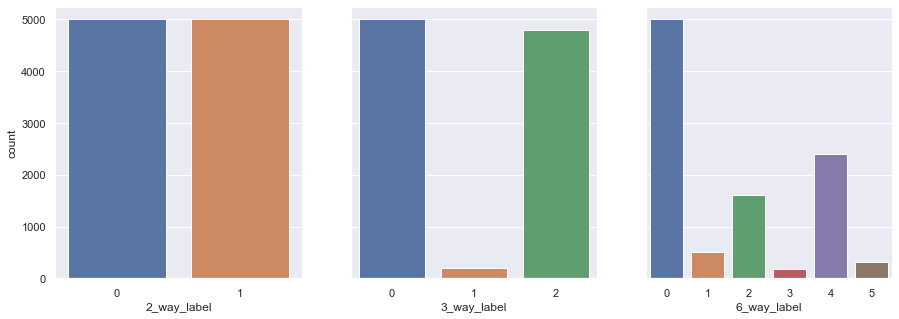

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

g0 = sns.countplot(data=train_df, x="2_way_label", ax=ax1)
g1 = sns.countplot(data=train_df, x="3_way_label", ax=ax2)
g2 = sns.countplot(data=train_df, x="6_way_label", ax=ax3)

g1.set(ylabel=None)
g2.set(ylabel=None)

plt.show();

# Image Analysis

In [18]:
frames = [test_df, train_df, validate_df]
total_df = pd.concat(frames)

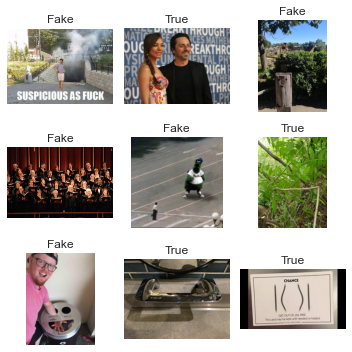

In [19]:
plt.figure(figsize=(5, 5))

for i, (_, r) in enumerate(total_df.sample(n=9, random_state=2).iterrows()):
    img_path = str(Path(dataset_images_path, f'{r.id}.jpg'))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(img_path))
    plt.title(f'{"True" if r["2_way_label"] else "Fake"}')
    plt.axis("off")

plt.tight_layout()
plt.savefig('image_sample.png')

### Image sizes

In [20]:
tqdm.pandas(desc="progress bar")

def get_sizes(row):
    width = None
    height = None
    img_path = Path(dataset_images_path, f'{row.id}.jpg')
    
    with Image.open(img_path) as img:
        width, height = img.size

    return pd.Series([width, height], index=['img_width', 'img_height'])

x = total_df.progress_apply(get_sizes, axis=1)

d:\project-experiments\venv\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
progress bar: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12000/12000 [00:14<00:00, 846.95it/s]


In [21]:
x.describe()

,img_width,img_height
count,"12,000.00","12,000.00"
mean,537.45,474.19
std,558.98,456.49
min,100.00,23.00
25%,320.00,213.00
50%,320.00,339.00
75%,320.00,520.00
max,"9,250.00","5,457.00"
